In [38]:
# todo
# normalizar los datos de la poblacion
# cargar las features para todo X, no solo xtrain

In [6]:
import numpy as np
import pandas as pd
from keras.src.callbacks import EarlyStopping
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.src.utils import load_img, img_to_array, array_to_img
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from keras.api.applications.vgg16 import preprocess_input, VGG16
import tensorflow as tf
import os
from PIL import Image


In [2]:
dispositivos = tf.config.list_physical_devices('GPU')
if dispositivos:
    print("TensorFlow ha detectado las siguientes GPUs:")
    for gpu in dispositivos:
        print(gpu)
else:
    print("No se ha detectado ninguna GPU.")

TensorFlow ha detectado las siguientes GPUs:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


I0000 00:00:1732548989.303340   38199 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732548989.339822   38199 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732548989.341090   38199 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


Image downscaling

In [12]:
input_folder = "./pictures_224"
output_folder = "./pictures_224"

In [41]:
# target_dimensions = (224, 224)
# 
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)
# 
# for file_name in os.listdir(input_folder):
#     input_path = os.path.join(input_folder, file_name)
#     if not file_name.lower().endswith(('.png')):
#         print(f"Saltando archivo no soportado: {file_name}")
#         continue
# 
#     try:
#         original_image = load_img(input_path)
#         resized_image = original_image.resize(target_dimensions)
#         output_path = os.path.join(output_folder, file_name)
#         resized_image.save(output_path)
#         print(f"Redimensionada: {file_name} -> {output_path}")
#     except Exception as e:
#         print(f"Error al procesar {file_name}: {e}")

Redimensionada: 687.png -> ./pictures_224/687.png
Redimensionada: 426.png -> ./pictures_224/426.png
Redimensionada: 1281.png -> ./pictures_224/1281.png
Redimensionada: 552.png -> ./pictures_224/552.png
Redimensionada: 1069.png -> ./pictures_224/1069.png
Redimensionada: 1008.png -> ./pictures_224/1008.png
Redimensionada: 891.png -> ./pictures_224/891.png
Redimensionada: 960.png -> ./pictures_224/960.png
Redimensionada: 142.png -> ./pictures_224/142.png
Redimensionada: 1954.png -> ./pictures_224/1954.png
Redimensionada: 1793.png -> ./pictures_224/1793.png
Redimensionada: 1414.png -> ./pictures_224/1414.png
Redimensionada: 1846.png -> ./pictures_224/1846.png
Redimensionada: 1878.png -> ./pictures_224/1878.png
Redimensionada: 491.png -> ./pictures_224/491.png
Redimensionada: 1586.png -> ./pictures_224/1586.png
Redimensionada: 151.png -> ./pictures_224/151.png
Redimensionada: 1446.png -> ./pictures_224/1446.png
Redimensionada: 350.png -> ./pictures_224/350.png
Redimensionada: 2285.png -> ./

In [13]:
datagen = ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [14]:
for file_name in os.listdir(input_folder):
    input_path = os.path.join(input_folder, file_name)
    if not file_name.lower().endswith('.png'):
        print(f"Saltando archivo no soportado: {file_name}")
        continue

    try:
        original_image = load_img(input_path)
        img_array = img_to_array(original_image)
        img_array = np.expand_dims(img_array, axis=0)

        i = 0
        for batch in datagen.flow(img_array, batch_size=10):
            i += 1
            # Generar un nombre de archivo personalizado
            base_name = os.path.splitext(file_name)[0]  # Nombre sin extensión
            new_file_name = f"aug_{base_name}_{i}.png"
            output_path = os.path.join(output_folder+"_augmented", new_file_name)
            # Convertir el array de nuevo a imagen y guardar
            augmented_image = array_to_img(batch[0])
            augmented_image.save(output_path)
            if i >= 5:  # Generar 5 imágenes aumentadas por archivo
                break

        print(f"Imágenes aumentadas generadas para: {file_name}")
    except Exception as e:
        print(f"Error al procesar {file_name}: {e}")

Imágenes aumentadas generadas para: 687.png
Imágenes aumentadas generadas para: 426.png
Imágenes aumentadas generadas para: 1281.png
Imágenes aumentadas generadas para: 552.png
Imágenes aumentadas generadas para: 1069.png
Imágenes aumentadas generadas para: 1008.png
Imágenes aumentadas generadas para: 891.png
Imágenes aumentadas generadas para: 960.png
Imágenes aumentadas generadas para: 142.png
Imágenes aumentadas generadas para: 1954.png
Imágenes aumentadas generadas para: 1793.png
Imágenes aumentadas generadas para: 1414.png
Imágenes aumentadas generadas para: 1846.png
Imágenes aumentadas generadas para: 1878.png
Imágenes aumentadas generadas para: 491.png
Imágenes aumentadas generadas para: 1586.png
Imágenes aumentadas generadas para: 151.png
Imágenes aumentadas generadas para: 1446.png
Imágenes aumentadas generadas para: 350.png
Imágenes aumentadas generadas para: 2285.png
Imágenes aumentadas generadas para: 2006.png
Imágenes aumentadas generadas para: 413.png
Imágenes aumentadas 

In [31]:
import os
import pandas as pd

augmented_folder = "./pictures_224_augmented"
data = []

# Cargar el CSV y convertir 'id' a tipo 'str'
population_ds = pd.read_csv('./population.csv')
population_ds['id'] = population_ds['id'].astype(str)

for nombre_archivo in os.listdir(augmented_folder):
    location = os.path.join(augmented_folder, nombre_archivo)
    id = nombre_archivo.replace("aug_","").split("_",1)[0]
    data.append({
        'location': location,
        'id': id
    })

images_ds = pd.DataFrame(data)
images_ds['id'] = images_ds['id'].astype(str)
images_ds['location'] = images_ds['location'].astype(str)
ds = pd.merge(images_ds, population_ds, on='id', how='left')
ds.drop('id', axis=1, inplace=True)
ds


,location,population
0,./pictures_224_augmented/aug_2034_2.png,0.000000
1,./pictures_224_augmented/aug_1909_1.png,377.630491
2,./pictures_224_augmented/aug_1579_5.png,2620.462209
3,./pictures_224_augmented/aug_1382_2.png,427.427092
4,./pictures_224_augmented/aug_1423_3.png,1625.360612
...,...,...
11635,./pictures_224_augmented/aug_2274_2.png,5.868478
11636,./pictures_224_augmented/aug_840_2.png,8.798968
11637,./pictures_224_augmented/aug_1733_1.png,9.971087
11638,./pictures_224_augmented/aug_1533_5.png,4557.015624


In [47]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(np.array(features_list))
# scaled_features

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, ds["population"], test_size=0.25, random_state=42)

In [52]:
y_train

8334        9.770785
6273      601.352568
11504    1210.939651
4459     1243.391076
9729       16.117867
            ...     
11284     693.290438
5191       12.801830
5390     1087.193248
860      1630.604262
7270     2812.648114
Name: population, Length: 8730, dtype: float64

In [ ]:
y_train

In [45]:
X_test

array([[ 0.3094849 ,  2.478751  , -0.63630843, ..., -0.25882256,
         2.697479  ,  2.0728877 ],
       [-0.50721765, -0.21518184, -0.56120616, ..., -0.25882256,
        -0.17882843, -0.6044199 ],
       [-0.08523446,  0.29096758, -0.66225535, ..., -0.25882256,
         0.8243464 , -0.6899249 ],
       ...,
       [-0.6662213 , -0.43930367, -0.00717296, ..., -0.25882256,
        -1.3947453 , -0.3721395 ],
       [-0.49341834, -0.7342504 ,  0.87389797, ...,  4.7011    ,
         0.8798694 ,  0.10363661],
       [-0.33402613,  0.06995112, -0.42455578, ..., -0.25882256,
        -0.20762368, -0.4869872 ]], dtype=float32)

In [48]:
from keras.src.layers import Dense, Dropout
from keras import Sequential

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

/opt/projects/marvik/processing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525,825 (2.01 MB)

 Trainable params: 525,825 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
print(np.any(np.isnan(X_train)), np.any(np.isnan(y_train)))
print(np.any(np.isnan(X_test)), np.any(np.isnan(y_test)))
print(np.any(np.isinf(X_train)), np.any(np.isinf(y_train)))
print(np.any(np.isinf(X_test)), np.any(np.isinf(y_test)))

False True
False True
False False
False False


In [49]:
model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error']
)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 8/100
219

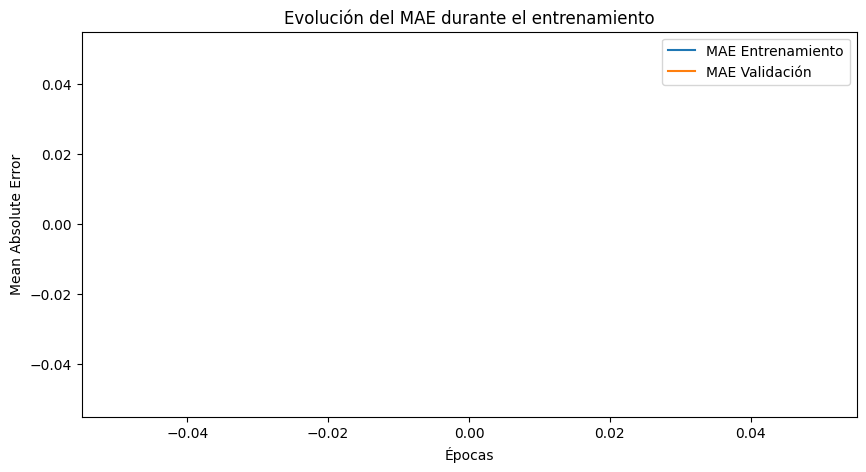

In [50]:
from matplotlib import pyplot as plt

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, 
    y_train, 
    epochs=100,
    batch_size=32, 
    validation_split=0.2, 
    verbose=1,
    callbacks=[early_stop]
)

def plot_training(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['mean_absolute_error'], label='MAE Entrenamiento')
    plt.plot(history.history['val_mean_absolute_error'], label='MAE Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.title('Evolución del MAE durante el entrenamiento')
    plt.show()

plot_training(history)

In [39]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

In [40]:
print(f'Error Cuadrático Medio (MSE) en Prueba: {test_loss:.4f}')
print(f'Error Absoluto Medio (MAE) en Prueba: {test_mae:.4f}')

Error Cuadrático Medio (MSE) en Prueba: nan
Error Absoluto Medio (MAE) en Prueba: nan


In [55]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test).flatten()

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.4f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MSE: 276818.0204
R²: 0.6896


In [56]:
np.sqrt(360893)

600.7437057514627

In [69]:
model.save('./modelo.keras')

In [71]:
import pickle

# Guardar el scaler entrenado
with open('app/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)